# Scraping job offers from the pole-emploi website

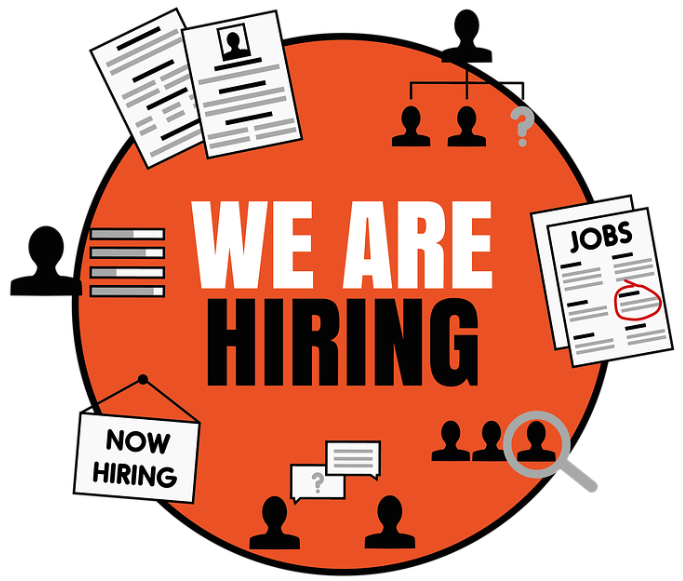

Installation of required modules

In [1]:
! pip install requests
! pip install beautifulsoup4

Import of modules

In [2]:
import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin
import pandas as pd

## FIRST METHOD

We choose like:

profession: IT and workplace: France

In [3]:
base_url = 'https://candidat.pole-emploi.fr/'
current_page = 'https://candidat.pole-emploi.fr/offres/recherche?lieux=01P&motsCles=informatique&offresPartenaires=true&rayon=10&tri=0'
pages = []

In [4]:
print("Retrieving page URLs...")

def get_pages(current_page):
    response = requests.get(current_page)
    
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        div = soup.find('div', {'id': 'zoneAfficherPlus'})
        if div:
            next_page_link = div.find('a')
            if next_page_link:
                next_page_url = urljoin(base_url, next_page_link.get('href'))
                pages.append(next_page_url)
                return next_page_url
        else:
            return None  # No more next pages
    else:
        print(f"Failed to fetch {page_url}. Status code: {response.status_code}")
        return None

while True:
    pages.append(current_page)
    html_doc = requests.get(current_page).text
    soup = BeautifulSoup(html_doc, "html.parser")
    current_page = get_pages(current_page)
    if current_page is None:
        break

print("End page URL recovery.")

Retrieving page URLs...
End page URL recovery.


In [5]:
pages_list = []
for i in pages:
    if i not in pages_list:
        pages_list.append(i)

In [6]:
pages_list

['https://candidat.pole-emploi.fr/offres/recherche?lieux=01P&motsCles=informatique&offresPartenaires=true&rayon=10&tri=0',
 'https://candidat.pole-emploi.fr/offres/recherche.rechercheoffre:afficherplusderesultats/20-39/0?lieux=01P&motsCles=informatique&offresPartenaires=true&rayon=10&tri=0',
 'https://candidat.pole-emploi.fr/offres/recherche.rechercheoffre:afficherplusderesultats/40-59/0?lieux=01P&motsCles=informatique&offresPartenaires=true&rayon=10&tri=0',
 'https://candidat.pole-emploi.fr/offres/recherche.rechercheoffre:afficherplusderesultats/60-79/0?lieux=01P&motsCles=informatique&offresPartenaires=true&rayon=10&tri=0',
 'https://candidat.pole-emploi.fr/offres/recherche.rechercheoffre:afficherplusderesultats/80-99/0?lieux=01P&motsCles=informatique&offresPartenaires=true&rayon=10&tri=0',
 'https://candidat.pole-emploi.fr/offres/recherche.rechercheoffre:afficherplusderesultats/100-119/0?lieux=01P&motsCles=informatique&offresPartenaires=true&rayon=10&tri=0',
 'https://candidat.pole-e

Get content of offers

In [7]:
offer = []
def get_offer(page):
    html_doc = requests.get(page).text
    soup = BeautifulSoup(html_doc, 'html.parser')
    lis = soup.find_all('li', class_='result')

    for li in lis:
        try:
            title = li.find('h2', class_='t4 media-heading').text.strip()
        except:
            title = ''
        
        try:
            job_link = li.find('a', class_='media with-fav').get('href')
            job_link = urljoin(base_url, job_link)
        except:
            job_link = ''
        
        try:
            company = li.find('div', class_='media-body').find('p', class_='subtext').text.split('-')
            company = company[0].strip()
        except:
            company = ''
        
        try:
            localisation = li.find('div', class_='media-body').find('p', class_='subtext').find('span').text.strip()
        except:
            localisation = ''
        
        try:
            description = li.find('div', class_='media-body').find('p', class_='description').text.strip()
        except:
            description = ''
        
        try:
            contract = li.find('div', class_='media-body').find('p', class_='contrat visible-xs').text.split('-')
            contract = contract[0].strip() + ' - ' + contract[1].strip()
        except:
            contract = ''

        try:
            date = li.find('div', class_='media-body').find('p', class_='date').text.strip()
        except:
            date = ''

        job = {
            'Title': title,
            'Company': company,
            'Localisation': localisation,
            'Description': description,
            'Contract': contract,
            'Date': date,
            'Job_link': job_link,
            }
        offer.append(job)

for page in pages_list:
    get_offer(page)

Result

In [8]:
offer

[{'Title': 'Technicien maintenance informatique (F/H)',
  'Company': 'JBM BUREAU MEDICAL',
  'Localisation': '13 - AIX EN PROVENCE',
  'Description': 'Pour ce poste, vos missions sont les suivantes : \n- Installation de matériel informatique : Installer, configurer.\n- Mise en place de nouvelle machines virtuelles\n- Création de compte VPN\n- Mise en...',
  'Contract': 'CDI - Temps plein',
  'Date': "Publié aujourd'hui",
  'Job_link': 'https://candidat.pole-emploi.fr/offres/recherche/detail/164GCCY'},
 {'Title': "Agent du réseau d'assistance informatique académique (H/F)",
  'Company': 'RECTORAT DE L ACADEMIE REIMS',
  'Localisation': '51 - CHALONS EN CHAMPAGNE',
  'Description': "POSTE A POURVOIR au 01/12/2023.\n\nL'agent du département relations à l'usager est un informaticien qui, au niveau de l'académie, assure la mise en œuvre du schéma directeur national, inter-académique...",
  'Contract': 'CDD - Temps plein',
  'Date': "Publié aujourd'hui",
  'Job_link': 'https://candidat.pole-

Save the data to a excel file

In [22]:
df = pd.DataFrame(offer)
df.to_excel("jobs-pole_emploi.xlsx")

## SECOND METHOD

We choose like:

profession: IT and workplace: France

In [9]:
base_url = 'https://candidat.pole-emploi.fr/'
current_page = 'https://candidat.pole-emploi.fr/offres/recherche?lieux=01P&motsCles=informatique&offresPartenaires=true&rayon=10&tri=0'
pages = []

### Retrieving job page URLs

The get_pages function is defined to extract URLs from job posting pages.
It first checks if the HTTP response is successful (status code 200), then uses Beautiful Soup to extract links to subsequent pages if they exist.
A while loop is used to iterate through successive pages and add their URLs to the pages list.
Finally, a pages_list is created to eliminate duplicates in the list of page URLs.

In [10]:
print("Retrieving page URLs...")

def get_pages(current_page):
    response = requests.get(current_page)
    
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        div = soup.find('div', {'id': 'zoneAfficherPlus'})
        if div:
            next_page_link = div.find('a')
            if next_page_link:
                next_page_url = urljoin(base_url, next_page_link.get('href'))
                pages.append(next_page_url)
                return next_page_url
        else:
            return None  # No more next pages
    else:
        print(f"Failed to fetch {page_url}. Status code: {response.status_code}")
        return None

while True:
    pages.append(current_page)
    html_doc = requests.get(current_page).text
    soup = BeautifulSoup(html_doc, "html.parser")
    current_page = get_pages(current_page)
    if current_page is None:
        break

pages_list = []
for i in pages:
    if i not in pages_list:
        pages_list.append(i)
        
print("End page URL recovery.")

Retrieving page URLs...
End page URL recovery.


### Retrieving job posting URLs

The get_jobs_url function is defined to extract job posting URLs from a given page. It goes through the li elements with the 'result' class to extract the URLs of the offers.
A for loop iterates through the list of pages (pages_list), then each page is parsed to extract job posting URLs, which are then added to the jobs_list.

In [11]:
print("URL retrieval of offers...")
jobs_list = []
def get_jobs_url(current_page):
    urls = []
    li = soup.find_all('li', class_='result')
    for element in li:
        url = element.find('a').get('href')
        url = urljoin(base_url, url)
        urls.append(url)
    return urls

for page in pages_list:
    html_doc = requests.get(page)
    soup = BeautifulSoup(html_doc.content, 'html.parser')
    link = get_jobs_url(soup)
    jobs_list.extend(link)
    
print("End of offer URL retrieval.") 

URL retrieval of offers...
End of offer URL retrieval.


### Retrieving job offer content

The get_jobs_content function is defined to extract job posting content from a job URL. It searches for information such as company name, job title, location, etc.
A for loop iterates through the list of job posting URLs (jobs_list) and calls the get_jobs_content function to extract information from each posting. The extracted information is then added to the jobs list.
A try...except block is used to handle cases where an offer does not contain a company name or job title.

In [12]:
jobs = []
print("Retrieving the content of offers...")

def get_jobs_content(url):
    html_doc = requests.get(url).text
    soup = BeautifulSoup(html_doc, 'html.parser')
    try:
        company = soup.find('div', class_='media-body').find('h3', class_='t4 title').text.strip()
    except:
        company = ''
    try:
        company_member = soup.find('div', class_='media-body').find('p').text.strip()
    except:
        company_member = ''

    try:
        company_description = soup.find('div', class_='media').find('p', class_='italic').text.strip()
        company_description = company_description.replace('\n', '')
        company_description = company_description.replace('\t', '')
    except:
        company_description = ''

    try:
        title = soup.find('h1', class_='t2 title').find('span', {'itemprop': 'title'}).text.strip()
    except:
        title = ''
        
    try:
        localisation = soup.find('p', class_='t4 title-complementary').text.strip()#.find('span', {'itemprop':'name'}).text.strip()
        localisation = localisation.split('\n')[0]
    except:
        localisation = ''

    try:
        Publish_date = soup.find('p', class_='t5 title-complementary').text.strip()#.find('span', {'itemprop':'datePosted'}).text.strip()
    except:
        Publish_date = ''
    
    try:
        description = soup.find('div', class_='description').text.strip()
        description = description.replace('\n', '')
        description = description.replace('\t', '.')
    except:
        description = ''
    try:
        experience = soup.find('span', {'itemprop':'experienceRequirements'}).text.strip()
    except:
        experience = ''

    try:
        formation = soup.find('span', {'itemprop':'educationRequirements'}).text.strip()
        formation = formation.replace('\n', '')
    except:
        formation = ''
    try:
        competences = soup.find_all('span', class_='skill skill-competence')
        competences_kill = []
        for competence in competences:
            skill = competence.find('span', class_='skill-name').text
            competences_kill.append(skill)
        competences = competences_kill
    except:
        competences = ''

    try:
        language = soup.find('span', class_='skill skill-langue').text.strip()
    except:
        language = ''
    try:
        contrat = soup.find('dl', class_='icon-group').find('dd').text.strip()
        contrat = contrat.replace('\n', ' ')
    except:
        contrat = ''
    try:
        time_work = soup.find('dd', {'itemprop':'workHours'}).text.strip()
        time_work = time_work.replace('\n', ' ')
    except:
        time_work = ''
    try:
        money = soup.find('dl', class_='icon-group').find('ul').text.strip()
    except:
        money = ''
    
    return {
        'Title': title,
        'Publish-date': Publish_date,
        'Contrat': contrat,
        'time-work': time_work,
        'money': money,
        'language': language,
        'Company': company,
        'Company-figure': company_member,
        'Company-description': company_description,
        'Localisation': localisation,
        'Description': description,
        'experience': experience,
        'formation': formation,
        'competences': competences,
        }

for job in jobs_list:
    try:
        offer_work = get_jobs_content(job)
        jobs.append(offer_work)
    except:
        print('Offer not have company and title!')

print("End of retrieval of offer content.")

Retrieving the content of offers...
End of retrieval of offer content.


Result

In [13]:
jobs

[{'Title': 'Technicien maintenance informatique (F/H)',
  'Publish-date': 'Actualisé le 02 novembre 2023',
  'Contrat': 'Contrat à durée indéterminée  Contrat travail',
  'time-work': '37H Travail en journée',
  'money': 'Salaire brut : Annuel de 26000,00 Euros sur 12 mois',
  'language': '',
  'Company': 'JBM BUREAU MEDICAL',
  'Company-figure': '10 à 19 salariés',
  'Company-description': "Expectra, leader en France de l'intérim spécialisé et du recrutement en CDI de cadres et agents de maîtrise.Les consultants du Département Informatique - Infogérance vous proposent des opportunités de carrière.",
  'Localisation': '13 - AIX EN PROVENCE',
  'Description': 'Pour ce poste, vos missions sont les suivantes : - Installation de matériel informatique : Installer, configurer.- Mise en place de nouvelle machines virtuelles- Création de compte VPN- Mise en place de nouveau switch Cisco',
  'experience': '2 ans',
  'formation': "Bac+2 ou équivalents informatique et systèmes d'information",
  '

In [14]:
len(jobs)

1000

Save the data to a excel file

In [21]:
df = pd.DataFrame(jobs)
df.to_excel("jobs.xlsx")